In [1]:
import matplotlib.pyplot as plt

from superfv import AdvectionSolver
import superfv.initial_conditions as ic
import superfv.visualization as vis

import numpy as np

In [2]:
sim = AdvectionSolver(
    ic=lambda idx, x, y, z: ic.square(idx, x, y, z, vx=2, vy=1),
    nx=32,
    ny=32,
    p=3,
    interpolation_scheme="gauss-legendre",
    ZS=True,
    max_dt_revisions=8,
    PAD={"rho": (0, 1)},
    CFL=0.8,
    SED=False,
)
sim.run(1.0)

100%|██████████| 1.0/1.0 [00:03]                 


In [3]:
np.min(sim.minisnapshots["min_rho"]), np.max(sim.minisnapshots["max_rho"])

(np.float64(-1.1839036676158845e-16), np.float64(1.0))

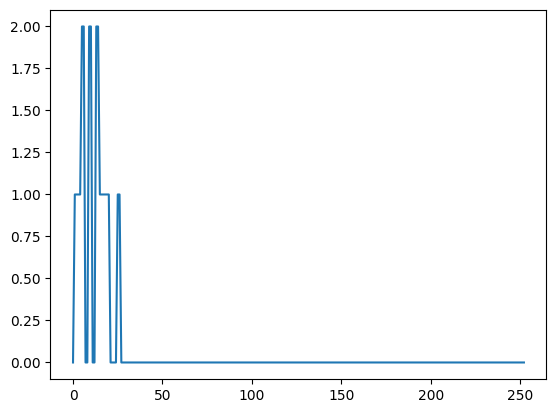

In [4]:
plt.plot(sim.minisnapshots["dt_revisions"])

/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.484375.
  warnings.warn(
/Users/jonathan/Desktop/superfv/superfv/visualization.py:32: UserWarning: Coordinate 0.5 not found in array. Using nearest: 0.484375.
  warnings.warn(


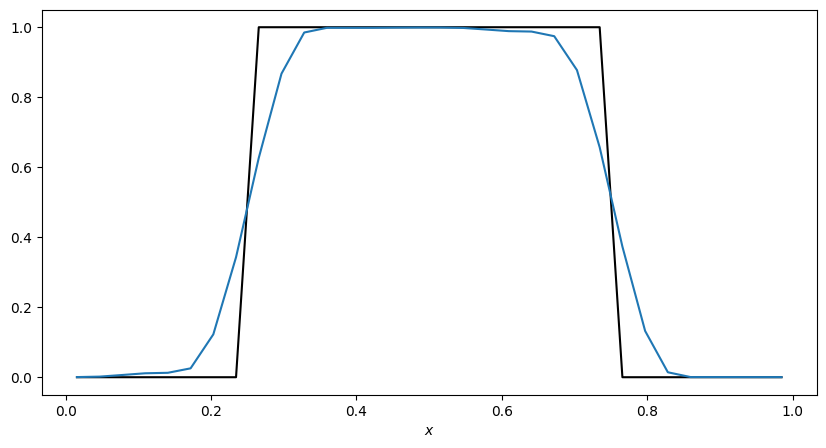

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, t=0, color="k")
vis.plot_1d_slice(sim, ax, "rho", cell_averaged=True, x=None, xlabel=True)

In [6]:
sim.timer.print_report()

Category                                              Calls      Cumulative Time
----------------------------------------------------------------------------------
!ExplicitODESolver.integrate.body                         1                 3.45
!FiniteVolumeSolver.run                                   1                 3.49
AdvectionSolver.advection_upwind                       1104                 0.13
AdvectionSolver.compute_dt                              126                 0.02
AdvectionSolver.minisnapshot                            253                 0.01
ExplicitODESolver.integrate                               1                 3.49
ExplicitODESolver.minisnapshot                          253                 0.00
ExplicitODESolver.take_step                             126                 3.34
FiniteVolumeSolver.adaptive_dt_criterion                138                 0.01
FiniteVolumeSolver.adaptive_dt_revision                  12                 0.00
FiniteVolumeSolver.apply_b